In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')

In [3]:
df.shape

(2938, 22)

In [4]:
from sklearn.impute import SimpleImputer


# List of columns with null values
nullColmDict = ['Life expectancy ', 'Adult Mortality', 'Alcohol',
                'percentage expenditure', 'Hepatitis B', ' BMI ', 'Polio',
                'Total expenditure', 'Diphtheria ', 'GDP', 'Population',
                ' thinness  1-19 years', ' thinness 5-9 years',
                'Income composition of resources', 'Schooling']

# Create the imputer for the 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Apply imputer to each column in the list
for column in nullColmDict:
    df[column] = imputer.fit_transform(df[[column]])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
df['Life expectancy ']

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2938, dtype: float64

In [7]:
#df.groupby('Country')['Life expectancy '].mean().sort_values(ascending=False)
#df.sort_values(by='Alcohol', ascending=True)

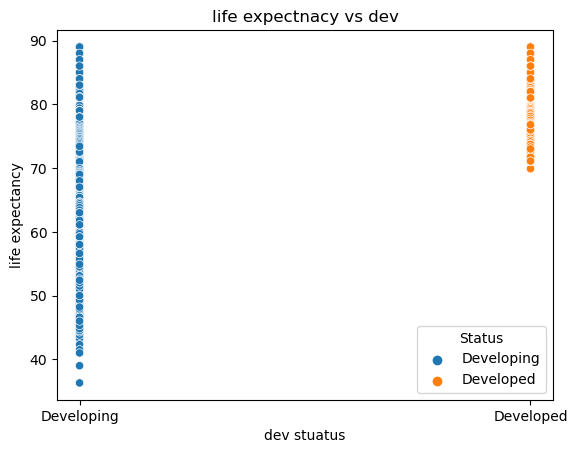

In [8]:
sns.scatterplot(data=df, x='Status', y='Life expectancy ', hue='Status')
plt.xlabel('dev stuatus')
plt.ylabel('life expectancy')
plt.title('life expectnacy vs dev')
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Status'] = le.fit_transform(df['Status'])
df['Country'] = le.fit_transform(df['Country'])
df['Country'].value_counts()

Country
0      16
132    16
121    16
122    16
123    16
       ..
124     1
146     1
117     1
142     1
49      1
Name: count, Length: 193, dtype: int64

In [10]:
cm = df.corr()
cm['Life expectancy '].abs().sort_values(ascending=False)
cm['Life expectancy '].abs().sort_values(ascending=False).keys()

Index(['Life expectancy ', 'Schooling', 'Adult Mortality',
       'Income composition of resources', ' BMI ', ' HIV/AIDS', 'Status',
       'Diphtheria ', ' thinness  1-19 years', ' thinness 5-9 years', 'Polio',
       'GDP', 'Alcohol', 'percentage expenditure', 'under-five deaths ',
       'Total expenditure', 'Hepatitis B', 'infant deaths', 'Year', 'Measles ',
       'Population', 'Country'],
      dtype='object')

In [11]:
df.drop(columns=['infant deaths', 'Year', 'Measles ',
                 'Population', 'Country', 'under-five deaths ',
                 'Total expenditure', 'Hepatitis B'], inplace=True)

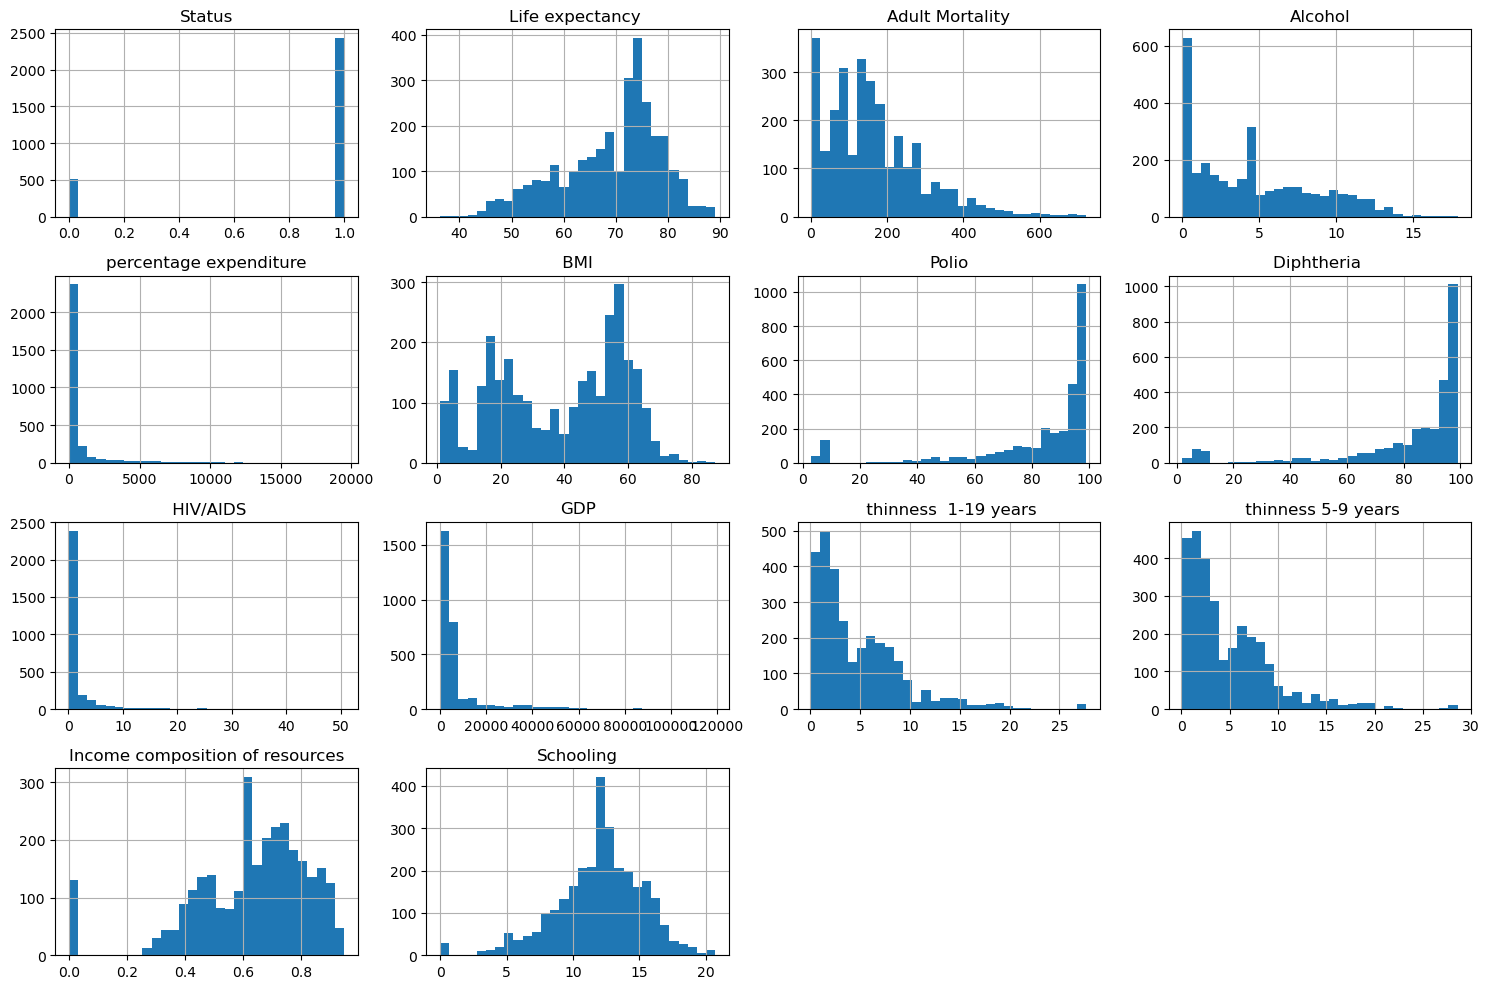

In [12]:
# Plot histograms for each numeric feature
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

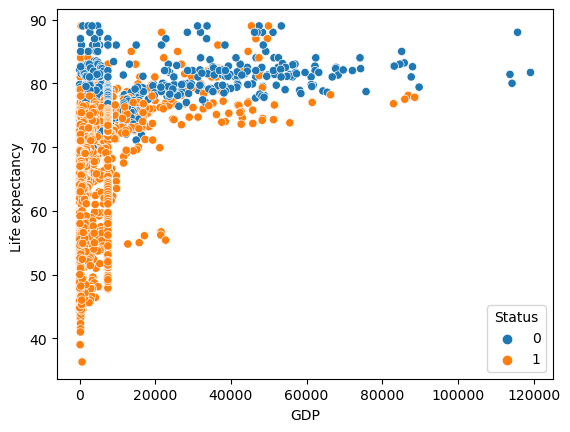

In [13]:
sns.scatterplot(x='GDP', y='Life expectancy ', hue='Status', data=df)
plt.show()

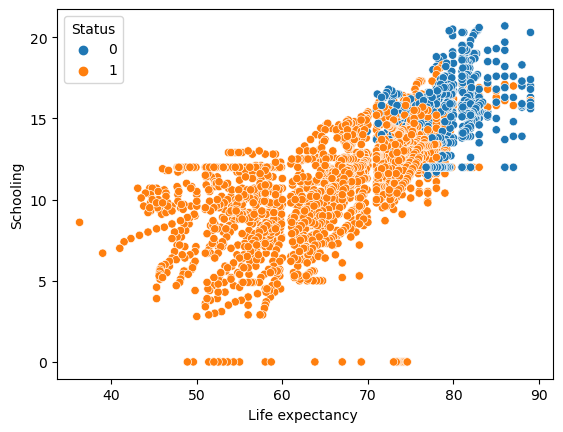

In [14]:
sns.scatterplot(x='Life expectancy ', y='Schooling',hue='Status' ,data=df)
plt.show()

In [ ]:
for column in df.columns:
    if column != 'Life expectancy ':
        sns.scatterplot(x=df[column], y=df['Life expectancy '])
        plt.show()

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled = df_scaled.drop('Status',axis=1)
x = df_scaled.iloc[:,1:]
y = df_scaled.iloc[:,:1]
x = np.array(x).astype('float32')
y = np.array(y).astype('float32')

array([[-0.44444793],
       [-0.98094994],
       [-0.98094994],
       ...,
       [-2.5694168 ],
       [-2.5168185 ],
       [-2.443181  ]], dtype=float32)

In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [75]:
from sklearn.linear_model import LinearRegression, Ridge
my_model= Ridge(alpha=21)
my_model = LinearRegression(fit_intercept=True)
my_model.fit(x_train,y_train)

LinearRegression()

In [76]:
from sklearn.metrics import mean_squared_error, accuracy_score,r2_score
model_accuracy = my_model.score(x_test, y_test)
y_pred = my_model.predict(x_test)

In [77]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, r2,model_accuracy)

0.18106566 0.8056101531032535 0.8056101531032535
